In [ ]:
open("/content/drive/MyDrive/transfer_learning/X_test.pickle", "rb")
open("/content/drive/MyDrive/transfer_learning/y_test.pickle", "rb")

open("/content/drive/MyDrive/transfer_learning/X_train.pickle", "rb")
open("/content/drive/MyDrive/transfer_learning/y_train.pickle", "rb")

open("/content/drive/MyDrive/transfer_learning/X_val.pickle", "rb")
open("/content/drive/MyDrive/transfer_learning/y_val.pickle", "rb")

<_io.BufferedReader name='/content/drive/MyDrive/transfer_learning/y_val.pickle'>

In [ ]:
import pickle

In [ ]:
X_test = pickle.load(open("/content/drive/MyDrive/transfer_learning/X_test.pickle", "rb"))
y_test = pickle.load(open("/content/drive/MyDrive/transfer_learning/y_test.pickle", "rb"))

X_train = pickle.load(open("/content/drive/MyDrive/transfer_learning/X_train.pickle", "rb"))
y_train = pickle.load(open("/content/drive/MyDrive/transfer_learning/y_train.pickle", "rb"))

X_val = pickle.load(open("/content/drive/MyDrive/transfer_learning/X_val.pickle", "rb"))
y_val = pickle.load(open("/content/drive/MyDrive/transfer_learning/y_val.pickle", "rb"))

In [ ]:
X_train[0]

array([[[0.43347639, 0.48927039, 0.4806867 ],
        [0.42918455, 0.48497854, 0.47639485],
        [0.43347639, 0.48927039, 0.4806867 ],
        ...,
        [0.472103  , 0.24892704, 0.13304721],
        [0.48927039, 0.2832618 , 0.15021459],
        [0.5193133 , 0.27467811, 0.14592275]],

       [[0.42918455, 0.48497854, 0.47639485],
        [0.44206009, 0.49785408, 0.48927039],
        [0.4248927 , 0.4806867 , 0.472103  ],
        ...,
        [0.53218884, 0.30901288, 0.24463519],
        [0.60944206, 0.39914163, 0.30901288],
        [0.51072961, 0.27896996, 0.1888412 ]],

       [[0.43347639, 0.48927039, 0.4806867 ],
        [0.43347639, 0.48927039, 0.4806867 ],
        [0.43347639, 0.48927039, 0.4806867 ],
        ...,
        [0.44206009, 0.21030043, 0.14592275],
        [0.53648069, 0.32188841, 0.23175966],
        [0.49356223, 0.27467811, 0.1888412 ]],

       ...,

       [[0.2360515 , 0.59656652, 0.81974249],
        [0.22317597, 0.58798283, 0.80257511],
        [0.26180258, 0

In [ ]:
import tensorflow as tf

In [ ]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top = False,
    weights = "imagenet",
    input_shape = (128,128,3),
    pooling = "max"
)

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(1024, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

predictions = tf.keras.layers.Dense(1, activation = "sigmoid")(x)

In [ ]:
# for _ in range(5):
#   x = tf.keras.layers.Dense(1024, activation = "relu")(x)
#   x = tf.keras.layers.Dropout(0.5)(x)

In [ ]:
head_model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

In [ ]:
head_model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

In [ ]:
history = head_model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 25,
    validation_data=(X_val, y_val)
)

Epoch 1/25
13/13 [==============================] - 15s 180ms/step - loss: 1.3862 - accuracy: 0.6106 - val_loss: 0.2320 - val_accuracy: 0.9200
Epoch 2/25
13/13 [==============================] - 1s 70ms/step - loss: 0.3133 - accuracy: 0.8906 - val_loss: 0.1518 - val_accuracy: 0.9400
Epoch 3/25
13/13 [==============================] - 1s 67ms/step - loss: 0.2037 - accuracy: 0.9162 - val_loss: 0.1296 - val_accuracy: 0.9450
Epoch 4/25
13/13 [==============================] - 1s 73ms/step - loss: 0.1431 - accuracy: 0.9469 - val_loss: 0.1115 - val_accuracy: 0.9500
Epoch 5/25
13/13 [==============================] - 1s 74ms/step - loss: 0.1164 - accuracy: 0.9550 - val_loss: 0.1113 - val_accuracy: 0.9550
Epoch 6/25
13/13 [==============================] - 1s 74ms/step - loss: 0.0889 - accuracy: 0.9631 - val_loss: 0.1141 - val_accuracy: 0.9550
Epoch 7/25
13/13 [==============================] - 1s 65ms/step - loss: 0.0985 - accuracy: 0.9613 - val_loss: 0.1121 - val_accuracy: 0.9500
Epoch 8/25


In [ ]:
head_model.metrics_names

['loss', 'accuracy']

In [ ]:
head_model.evaluate(X_test, y_test)

7/7 [==============================] - 1s 95ms/step - loss: 0.2121 - accuracy: 0.9400


[0.21205104887485504, 0.9399999976158142]

In [ ]:
import matplotlib.pyplot as plt

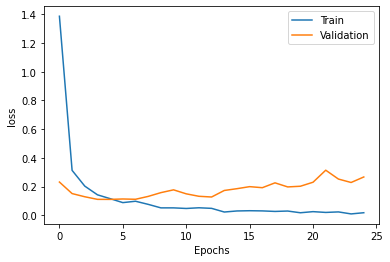

In [ ]:
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")

plt.xlabel("Epochs")
plt.ylabel("loss")

plt.legend()
plt.show()

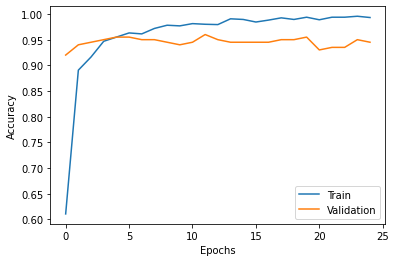

In [ ]:
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [ ]:
with open("model.pickle", "wb") as f:
  pickle.dump(head_model, f)